In [3]:
from numpy import *
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
from numpy import linalg as la
import pdb
import scipy.sparse as sparse
%matplotlib inline

### Reading dataset

In [4]:
rr = pd.read_json('renttherunway_final_data.json',lines=True)
rr.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [5]:
item_id = rr['item_id']
user_id = rr['user_id']
rating = rr['rating']

rr.drop('item_id', axis = 1,inplace = True)
rr.insert(0,'item_id',item_id)
rr.drop('user_id', axis = 1, inplace  = True)
rr.insert(1,'user_id',user_id)
rr.drop('rating', axis = 1,inplace = True)
rr.insert(2,'rating',rating)

rr.head()

,item_id,user_id,rating,fit,bust size,weight,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,2260466,420272,10.0,fit,34d,137lbs,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,153475,273551,10.0,fit,34b,132lbs,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,1063761,360448,10.0,fit,NaN,NaN,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,126335,909926,8.0,fit,34c,135lbs,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,616682,151944,10.0,fit,34b,145lbs,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


#### Number of records grouped by categories

In [6]:
pd.options.display.max_rows = 4000
rr.category.value_counts()

dress           92884
gown            44381
sheath          19316
shift            5365
jumpsuit         5184
top              4931
maxi             3443
romper           3070
jacket           2404
mini             1751
skirt            1531
sweater          1149
coat              980
blazer            782
shirtdress        729
blouse            651
down              464
pants             422
vest              278
shirt             277
cardigan          241
frock             205
culottes          188
tank              181
tunic             162
bomber            128
sweatshirt        125
suit              123
leggings          112
pant              107
print             103
legging            87
cape               84
culotte            75
pullover           58
midi               57
trouser            55
knit               48
poncho             48
peacoat            39
turtleneck         34
kimono             30
tee                22
trench             20
trousers           18
parka     

### Reducing Size of Dataset
This dataset was very large and slow to run hence we only used items from the two categories. We chose **gowns and jackets**. 

In [7]:
category_list = ['gown','jacket']

filtered_df = rr[rr['category'].isin(category_list)]

In [8]:
filtered_df.item_id.value_counts()

123793     1714
132738     1582
145906     1478
127865     1393
131533     1091
131117      981
125465      883
123373      686
154002      626
125564      612
168610      532
168592      529
139086      524
153475      519
128959      516
146684      498
138431      488
152662      485
140321      455
134015      440
142179      429
132135      427
166006      402
162634      402
141688      398
755371      396
131698      370
144714      356
638318      322
1729232     316
1687082     313
134849      312
149739      310
1213427     308
1064397     284
127081      266
466944      252
141548      249
432275      234
1661761     227
1773356     222
1882156     212
1229740     208
943243      203
1498329     198
1547971     196
1337205     196
503972      193
709832      190
1615177     190
1210233     187
1446293     184
158028      178
1956527     172
1662059     168
1146287     166
1241304     162
1515339     161
140877      160
1309537     159
1463543     156
1501987     153
203856  

In [9]:
filtered_df.user_id.value_counts()

32925     49
362951    32
408945    20
257847    15
984042    15
          ..
218237     1
914762     1
976200     1
843934     1
851968     1
Name: user_id, Length: 40003, dtype: int64

In [10]:
filtered_df

,item_id,user_id,rating,fit,bust size,weight,rented for,review_text,body type,review_summary,category,height,size,age,review_date
1,153475,273551,10.0,fit,34b,132lbs,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
4,616682,151944,10.0,fit,34b,145lbs,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
8,1729232,166228,10.0,fit,36d,NaN,formal affair,I was nervous of it looking cheap when it arri...,full bust,Great for black tie event!,gown,"5' 6""",21,27.0,"June 27, 2016"
9,1729232,154309,10.0,fit,32b,114lbs,formal affair,The dress was very flattering and fit perfectl...,petite,This dress was everything! It was perfect for ...,gown,"5' 3""",1,33.0,"October 17, 2016"
14,123793,721308,10.0,fit,34b,118lbs,formal affair,"Fit great, super flattering",athletic,Stunning gown. Wore this for heart ball and re...,gown,"5' 5""",2,32.0,"May 29, 2014"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192506,672419,78599,10.0,fit,NaN,136lbs,party,"This was one of my backup dresses, and it work...",hourglass,The customer service impeccable!,gown,"5' 3""",12,35.0,"April 12, 2017"
192513,765872,389288,10.0,small,34b,145lbs,wedding,I ordered a 4L and it was perfect length but w...,athletic,Besides this dress just being stunning and sex...,gown,"5' 4""",17,34.0,"June 30, 2015"
192515,125465,378332,10.0,fit,34d,NaN,wedding,This was my backup dress to a black tie weddin...,NaN,So Flowy and Fun!,gown,"5' 7""",13,31.0,"June 10, 2016"
192524,152662,62024,6.0,fit,32d,130lbs,date,This was my backup dress I didn't end up weari...,hourglass,Pretty but kind of bland,gown,"5' 9""",4,35.0,"April 23, 2014"


This gives us our rating matrix that has only the user_id, item_id, and rating. 

In [11]:
rr_rating = filtered_df.iloc[:,0:3]
rr_rating

,item_id,user_id,rating
1,153475,273551,10.0
4,616682,151944,10.0
8,1729232,166228,10.0
9,1729232,154309,10.0
14,123793,721308,10.0
...,...,...,...
192506,672419,78599,10.0
192513,765872,389288,10.0
192515,125465,378332,10.0
192524,152662,62024,6.0


In [12]:
rr_rating.describe()

,item_id,user_id,rating
count,4.678500e+04,46785.000000,46739.000000
mean,7.500169e+05,497567.806412,9.262457
std,7.205192e+05,288761.183263,1.304175
min,1.233730e+05,9.000000,2.000000
25%,1.384310e+05,249066.000000,8.000000
50%,4.669440e+05,495924.000000,10.000000
75%,1.242074e+06,747447.000000,10.000000
max,2.965924e+06,999954.000000,10.000000


Creating the User x Item matrix that is populated with the ratings. A pivot table is used for this step and any NaN values are filled in with 0. 

In [13]:
rr_rating.item_id = rr_rating.item_id.astype(object)
rr_rating.user_id = rr_rating.user_id.astype(object)

##### User x Item Matrix

In [14]:
M = rr_rating.pivot_table(index = ['user_id'],columns = ['item_id'],values = "rating")
M = M.replace(np.nan,0)
M

item_id,123373,123793,125465,125564,127081,127865,128959,131117,131533,131698,...,2935830,2935879,2941989,2945782,2947228,2948324,2956720,2960969,2963344,2965924
user_id,,,,,,,,,,,,,,,,,,,,,
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
item_ids = []
for i in M:
    item_ids.append(i)

In [16]:
M2 = np.mat(M)
M2

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [8., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

##### Item Similarity Measures

In [17]:
def pearsonSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5+0.5*corrcoef(inA, inB, rowvar = 0)[0][1]

In [18]:
def euclidSim(inA,inB):
    return 1.0 / (1.0 + la.norm(inA - inB))

In [19]:
def cosineSim(inA,inB):
    num = float(inA.T * inB)
    denom = la.norm(inA)*la.norm(inB)
    return 0.5 + 0.5 * (num / denom)

In [20]:
def standEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0: continue
        overLap = nonzero(logical_and(data[:,item]>0, data[:,j]>0))[0]
        if len(overLap) == 0:
            similarity = 0
        else:
            similarity = simMeas(data[overLap,item], data[overLap,j])
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

##### SVD Function

In [21]:
def svdEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    k = 4 #number of dimension for SVD
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    U,Sigma,VT = la.svd(data)
    Sig_k = mat(eye(k)*Sigma[:k]) #arrange Sig_k into a diagonal matrix
    xformedItems = data.T * U[:,:k] * Sig_k.I  #create transformed items
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMeas(xformedItems[item,:].T, xformedItems[j,:].T)
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

##### Recommender Function

In [22]:
def recommend(dataMat, user, N=3, simMeas=pearsonSim, estMethod=standEst):
    unratedItems = nonzero(dataMat[user,:].A==0)[1] #find unrated items 
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

In [23]:
user = 6
recommendations = recommend(M2, user, N=5, simMeas=pearsonSim, estMethod=standEst)
print(recommendations)

[(0, 10.0), (1, 10.0), (5, 10.0), (7, 10.0), (8, 10.0)]


Top 5 recommendations for User 6. As discussed in class, this method is not efficient, so will be using other methods for recommendations. 

### Creating an item item matrix

In [24]:
def item_item_matrix (dataMat,metric):
    M = dataMat.shape[1]
    itemScores = np.empty((M, M), dtype=float)
    for i in range(M):
        for j in range(M):
            similarity = metric(dataMat[i,:].T, dataMat[j,:].T)
            itemScores[i][j] = similarity
    return itemScores

##### Item x Item Matrix

In [25]:
item = item_item_matrix(M2,pearsonSim)
print(item)

[[1.         0.49942661 0.49919361 ... 0.49942661 0.49942661 0.49942661]
 [0.49942661 1.         0.49919361 ... 0.49942661 0.49942661 0.49942661]
 [0.49919361 0.49919361 1.         ... 0.49919361 0.49919361 0.49919361]
 ...
 [0.49942661 0.49942661 0.49919361 ... 1.         0.49942661 0.49942661]
 [0.49942661 0.49942661 0.49919361 ... 0.49942661 1.         0.49942661]
 [0.49942661 0.49942661 0.49919361 ... 0.49942661 0.49942661 1.        ]]


The function predicts the value based on item item similairty mtrix and the user ratings.

In [26]:
def pred_user (dataMat, user, item, simData):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0;
    for j in range(n):
        userRating = dataMat[user,j]
        if userRating == 0: continue
        overLap = nonzero(logical_and(dataMat[:,item]>0, dataMat[:,j]>0))[0]
        if len(overLap) == 0:
            similarity = 0
        else:
            similarity = simData[j,item]
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

The recommend function returns the top k similar items.

In [27]:
def pred_recommend (dataMat, user, item, N, simMat):
    unratedItems = nonzero(dataMat[user,:].A==0)[1] #find unrated items 
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = pred_user(dataMat, user, item, simMat)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

##### Predicted Recommend

In [28]:
pred_recommend(M2, 9, 123373, 5, item)

[(0, 10.0), (1, 10.0), (2, 10.0), (7, 10.0), (19, 10.0)]

The above cell shows the top 5 items similar to item_id 123373 and user 9

## User based - Using Kmeans Clustering

Text(0, 0.5, 'SSE')

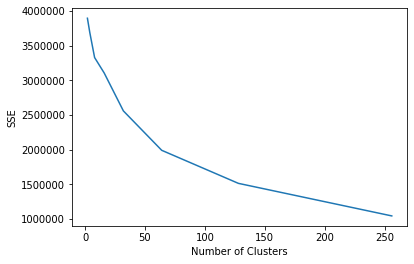

In [29]:
from sklearn.cluster import KMeans 
#http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial8/tutorial8.html
#8 minutes to load
numClusters = [2,4,8,16,32,64,128,256]
SSE = []
for k in numClusters:
    k_means = KMeans(n_clusters=k)
    k_means.fit(M2)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
#k=256

##### Kmeans 
Kmeans is run with around 125 clusters. The SSE appears to level off around 125 clusters and thus was chosen to the be number of clusters. 

In [30]:
k_means = KMeans(n_clusters = 125) #elbow around 125
k_means.fit(M2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=125, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
clusters = k_means.predict(M2)
clusters

array([ 27, 123,   0, ...,   0,  28, 108])

In [32]:
clusters_df = pd.DataFrame(clusters, columns = ["Clusters"])
clusters_df

,Clusters
0,27
1,123
2,0
3,52
4,123
...,...
39959,70
39960,123
39961,0
39962,28


##### Dataframe of Centeroids

These centroids represent the center of each cluster. 

In [33]:
centroids = pd.DataFrame(k_means.cluster_centers_,columns = item_ids)
centroids

,123373,123793,125465,125564,127081,127865,128959,131117,131533,131698,...,2935830,2935879,2941989,2945782,2947228,2948324,2956720,2960969,2963344,2965924
0,4.626060e-03,1.233616e-02,2.929838e-02,3.774758e-15,4.579670e-16,1.696222e-02,6.168080e-03,4.626060e-03,1.233616e-02,1.233616e-02,...,-8.239937e-17,-3.556183e-17,-1.561251e-17,-9.627715e-17,2.385245e-18,6.938894e-17,2.580401e-17,-4.076600e-17,-6.028164e-17,-1.192622e-17
1,1.821494e-02,2.185792e-02,-1.387779e-15,4.371585e-02,-2.567391e-16,1.457195e-02,-2.775558e-16,2.498002e-15,4.440892e-16,2.914390e-02,...,8.673617e-18,2.862294e-17,-9.757820e-18,6.938894e-18,2.515349e-17,-8.673617e-19,-9.324139e-18,-3.382711e-17,8.673617e-18,4.662069e-18
2,4.748603e-02,9.776536e-03,5.865922e-02,4.773959e-15,9.922618e-16,1.675978e-02,6.983240e-03,5.586592e-03,6.983240e-03,-1.137979e-15,...,-8.847090e-17,-7.372575e-18,-1.604619e-17,-1.071192e-16,1.778092e-17,7.459311e-17,3.274291e-17,-4.076600e-17,-7.459311e-17,-1.409463e-17
3,8.604794e-03,9.626306e+00,4.917025e-03,1.598033e-02,1.616762e-15,8.113092e-02,3.687769e-02,2.212661e-02,4.548248e-02,1.106331e-02,...,-9.540979e-17,2.471981e-17,-1.669671e-17,-1.196959e-16,3.556183e-17,7.979728e-17,4.054916e-17,-4.163336e-17,-9.107298e-17,-1.680513e-17
4,2.219756e-03,-6.827872e-15,4.217536e-02,1.109878e-02,-5.204170e-16,5.327414e-02,1.109878e-02,9.147614e+00,8.879023e-03,8.879023e-03,...,-5.290907e-17,-4.813858e-17,-1.387779e-17,-4.466913e-17,-1.951564e-18,4.683753e-17,-6.288373e-18,-3.816392e-17,6.071532e-18,-1.192622e-18
5,1.705426e-02,1.240310e-02,2.325581e-02,3.410853e-02,7.751938e-03,9.553488e+00,4.806202e-02,4.496403e-15,2.790698e-02,4.031008e-02,...,-8.153200e-17,-3.729655e-17,-1.561251e-17,-9.584347e-17,1.517883e-18,6.938894e-17,2.537033e-17,-4.076600e-17,-5.941428e-17,-1.181780e-17
6,8.247423e-02,-1.110223e-16,2.061856e-01,1.030928e-01,-3.469447e-17,-5.551115e-17,-9.714451e-17,-2.775558e-17,1.855670e-01,1.942890e-16,...,4.336809e-18,4.336809e-19,-1.951564e-18,3.035766e-18,-6.505213e-19,8.247423e-02,1.517883e-18,5.204170e-18,3.469447e-18,-6.505213e-19
7,2.288330e-02,1.609823e-15,6.864989e-02,2.288330e-02,4.118993e-02,1.498801e-15,2.288330e-02,1.830664e-02,1.327231e-01,-6.383782e-16,...,2.341877e-17,2.558717e-17,-7.372575e-18,6.505213e-18,1.756408e-17,-3.209238e-17,-8.673617e-18,-3.035766e-17,8.239937e-18,8.673617e-19
8,-3.885781e-16,1.609823e-15,5.970149e-02,2.132196e-02,-1.526557e-16,8.528785e-03,-4.579670e-16,1.887379e-15,1.554312e-15,-6.938894e-16,...,2.688821e-17,2.645453e-17,-8.239937e-18,6.938894e-18,2.016616e-17,-2.168404e-17,-8.890458e-18,-3.209238e-17,8.673617e-18,2.168404e-18
9,7.555556e-02,1.333333e-02,-1.332268e-15,3.555556e-02,-1.179612e-16,2.666667e-02,-4.579670e-16,1.777778e-02,1.333333e-02,-6.661338e-16,...,2.515349e-17,2.602085e-17,-7.806256e-18,6.938894e-18,1.864828e-17,-2.775558e-17,-8.673617e-18,-3.122502e-17,8.673617e-18,1.409463e-18


##### Cluster Sizes

In [34]:
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(M[clusters == c])
    return size

In [35]:
size = cluster_sizes(clusters)
clust_count = 0
for c in size.keys():
    clust_count+=1
    print("Size of Cluster", clust_count, "= ", size[c])

Size of Cluster 1 =  1297
Size of Cluster 2 =  549
Size of Cluster 3 =  1432
Size of Cluster 4 =  1627
Size of Cluster 5 =  901
Size of Cluster 6 =  1290
Size of Cluster 7 =  97
Size of Cluster 8 =  437
Size of Cluster 9 =  469
Size of Cluster 10 =  450
Size of Cluster 11 =  370
Size of Cluster 12 =  440
Size of Cluster 13 =  364
Size of Cluster 14 =  456
Size of Cluster 15 =  470
Size of Cluster 16 =  210
Size of Cluster 17 =  279
Size of Cluster 18 =  158
Size of Cluster 19 =  13
Size of Cluster 20 =  1015
Size of Cluster 21 =  404
Size of Cluster 22 =  371
Size of Cluster 23 =  55
Size of Cluster 24 =  78
Size of Cluster 25 =  93
Size of Cluster 26 =  184
Size of Cluster 27 =  779
Size of Cluster 28 =  484
Size of Cluster 29 =  583
Size of Cluster 30 =  138
Size of Cluster 31 =  490
Size of Cluster 32 =  76
Size of Cluster 33 =  216
Size of Cluster 34 =  536
Size of Cluster 35 =  112
Size of Cluster 36 =  276
Size of Cluster 37 =  265
Size of Cluster 38 =  89
Size of Cluster 39 =  3

### Measuring Quality of Cluster with Sillouette Values

The silloutte value measures how similar an object is to its cluster versus compared to other clusters. In other words, it is a look at cohesion and seperation of the clusters.

In [36]:
from sklearn import metrics
silhouettes = metrics.silhouette_samples(M2, clusters)
print(silhouettes[:20])

[ 0.81179154 -0.18620966  0.21523566  0.84095538 -0.18573372  0.1826167
  0.85848677  0.83292676  0.8349415   0.86451444  0.76240934  0.80385398
  0.85334639  0.82654357  0.85848677  0.81686271  0.85762204  0.34679455
 -0.40732288 -0.18429673]


##### Mean Silhouette
A high value indicates that the object is a good match for its cluster and is seperated from the rest of the cluster. The values range from -1 (not matched to its cluster) and +1 (well matched to its cluster). Our mean silhouette value was +.53 (changes a bit from run to run) which indicates that the clustering is approriate. 

In [37]:
print(silhouettes.mean())

0.45019731455195283


In [38]:
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

We can see the plot below, that a majority of the clusters are above the silouhette mean. 

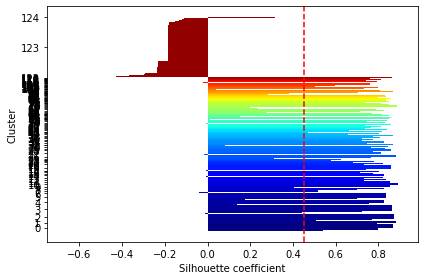

In [39]:
plot_silhouettes(M2, clusters)

In [40]:
clusters.shape

(39964,)

In [41]:
cluster_mat = np.mat(clusters)

In [42]:
M2.shape

(39964, 873)

In [43]:
M_target = M.copy()

In [44]:
M_target['Cluster'] = clusters

In [45]:
M_target

item_id,123373,123793,125465,125564,127081,127865,128959,131117,131533,131698,...,2935879,2941989,2945782,2947228,2948324,2956720,2960969,2963344,2965924,Cluster
user_id,,,,,,,,,,,,,,,,,,,,,
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70
999914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123
999922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


##### Cluster Prediction

Below we will be creating our cluster lables, then predicting it. After this, we will be able to evaluate the accuracy. 

In [46]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, yTrain, yTest = train_test_split(M,clusters, test_size=0.2)

In [47]:
def cosine_sim(x, D):
    D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
    x_norm = np.linalg.norm(x)
    # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
    sims = np.dot(D,x)/(D_norm * x_norm)
    # The distance measure will be the inverse of Cosine similarity
    #dists = 1 - sims
    idx = np.argsort(-sims) # sorting
    #print (idx)
    return str(idx[:1]).lstrip('[').rstrip(']'),np.max(sims)

In [48]:
def cluster_label(test_set, train_set, train_class, test_class,metric):
    numTestVecs = len(test_class)
    #print(numTestVecs)
    accCount = 0.0
    arr = []
    arr_sim = []
    for i in range(numTestVecs):
        index, sim = metric(test_set[i,:], train_set) # Setting the value of k to 1 and reusing the previous classifier model
        arr.append(int(index))
        arr_sim.append(sim)
    newArray = np.array(arr)
    newArray2 = np.array(arr_sim)
    #print(pd.DataFrame(newArray).head(10))
    test_set = np.column_stack((test_set,newArray))
    test_set = np.column_stack((test_set,newArray2))
    return test_set

In [49]:
Xtest = np.array(Xtest)
train_cl = np.array(centroids.index)
centroids_arr = np.array(centroids)
yTest = np.array(yTest)
Xtrain = np.array(Xtrain)
yTrain = np.array(yTrain)
#tclass= cluster_label(Xtest,centroids_arr,train_cl,yTest,pearsonSim)

In [50]:
lbl = cluster_label(Xtest, centroids_arr, train_cl, yTest,cosine_sim)

In [51]:
lbl_final = pd.DataFrame(lbl)
lbl_final = lbl_final.iloc[:,-2:]
lbl_final

,873,874
0,0.0,0.999915
1,17.0,0.999435
2,1.0,0.708157
3,3.0,0.999857
4,3.0,0.999857
...,...,...
7988,43.0,0.999445
7989,52.0,0.999612
7990,0.0,0.651635
7991,123.0,0.055992


In [52]:
lbl_final = lbl_final.rename(columns={873: 'Label', 874: 'Sim'})
lbl_final

,Label,Sim
0,0.0,0.999915
1,17.0,0.999435
2,1.0,0.708157
3,3.0,0.999857
4,3.0,0.999857
...,...,...
7988,43.0,0.999445
7989,52.0,0.999612
7990,0.0,0.651635
7991,123.0,0.055992


Above we can see the class label as well as the cosine similarity distance for each record.

In [53]:
lbl_final['Label'].value_counts()

123.0    2064
2.0       306
3.0       302
0.0       283
5.0       248
19.0      215
4.0       174
26.0      145
28.0      123
13.0      111
1.0       110
9.0       106
27.0      100
11.0       99
30.0       97
33.0       96
8.0        93
14.0       89
7.0        85
20.0       83
66.0       81
48.0       77
21.0       75
10.0       75
12.0       74
38.0       70
50.0       67
36.0       65
39.0       64
70.0       64
43.0       57
46.0       57
52.0       56
42.0       56
16.0       53
61.0       53
35.0       52
15.0       45
71.0       43
75.0       43
102.0      42
58.0       42
107.0      41
67.0       40
86.0       40
68.0       39
56.0       39
32.0       36
45.0       36
25.0       36
80.0       35
84.0       31
97.0       31
96.0       31
93.0       31
17.0       31
115.0      31
40.0       31
112.0      30
88.0       30
122.0      30
72.0       29
108.0      28
83.0       28
99.0       28
57.0       27
47.0       27
65.0       26
64.0       25
104.0      24
29.0       24
76.0  

In [54]:
def measure(x, D):
    D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
    x_norm = np.linalg.norm(x)
    # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
    sims = np.dot(D,x)/(D_norm * x_norm)
    # The distance measure will be the inverse of Cosine similarity
    #dists = 1 - sims
    idx = np.argsort(-sims) # sorting
    return idx[:1]

In [55]:
def evaluate(test_set, train_set, train_class, test_class,metric):
    numTestVecs = len(test_class)
    accCount = 0.0
    for i in range(numTestVecs):
        index = metric(test_set[i,:], train_set) # Setting the value of k to 1 and reusing the previous classifier model
        classifierResult = train_class[index]
        if (classifierResult == test_class[i]):
            accCount += 1.0
    print("Total accuracy rate:", accCount/float(numTestVecs) ,'\n')

In [56]:
eval= evaluate(Xtest, centroids_arr, train_cl, yTest,measure)
eval

Total accuracy rate: 0.9794820467909421 



Above we can see that by using the classifier that uses cosine similarity to choose the most similar cluster, the accuracy is about 98%

In [57]:
def knn_cosine_sim(x, D):
    D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
    x_norm = np.linalg.norm(x)
    # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
    sims = np.dot(D,x)/(D_norm * x_norm)
    # The distance measure will be the inverse of Cosine similarity
    dists = 1 - sims
    idx = np.argsort(-sims) # sorting
    #print (idx)
    return idx[:k],dists

### Gauging Overall Recommender System Performance With Alternating Least Squares

This idea was implemented by, and explained by Jesse Steinweg Woods, in the following link: https://nbviewer.jupyter.org/github/jmsteinw/Notebooks/blob/master/RecEngine_NB.ipynb

We adjusted some of the code, so that it was relevant to our dataset, and added a MAE calculation that we are unable to execute because of lack of computing power. 

In [58]:
import random
from scipy.sparse import csr_matrix

Below will be making our train set. Within this function there will test set which will be a copy of the test set. The training set within this function be implemented through ranom trials of the user and item responses. Since this interacting with a sparse matrix, it will be as if the user did not purchase the item before. 

In [59]:
def make_train(ratings, pct_test = 0.2):
    test_set = ratings.copy() # Make a copy of the original set to be the test set. 
    test_set[test_set != 0] = 1 # Store the test set as a binary preference matrix
    training_set = ratings.copy() # Make a copy of the original data we can alter as our training set. 
    nonzero_inds = training_set.nonzero() # Find the indices in the ratings data where an interaction exists
    nonzero_pairs = list(zip(nonzero_inds[0], nonzero_inds[1])) # Zip these pairs together of user,item index into list
    random.seed(0) # Set the random seed to zero for reproducibility
    num_samples = int(np.ceil(pct_test*len(nonzero_pairs))) # Round the number of samples needed to the nearest integer
    samples = random.sample(nonzero_pairs, num_samples) # Sample a random number of user-item pairs without replacement
    user_inds = [index[0] for index in samples] # Get the user row indices
    item_inds = [index[1] for index in samples] # Get the item column indices
    training_set[user_inds, item_inds] = 0 # Assign all of the randomly chosen user-item pairs to zero
    training_set.eliminate_zeros() # Get rid of zeros in sparse array storage after update to save space
    return training_set, test_set, list(set(user_inds)) # Output the unique list of user rows that were altered  

In [60]:
M3 = sparse.csr_matrix((M2))
M_train, M_test, M_users_altered = make_train(M3, pct_test = 0.2)

In [61]:
import implicit

**Alternating Least Squares**

We are implimenting alternating least square as a form of matrix factorization. This leads to an alternating calculation of user and item factors, which decrease out our cost function as it goes down. Essentially the cost function in this case can be described as the amount of interaction between users and items. There is then a preference score calcualted by a pvalue, that reccomends the highest preference. There are different parameters that will be tuned to check optimial performance, including:alpha, number of factors, regularization, and iterations. 

In [62]:
alpha = 50
user_vecs, item_vecs = implicit.alternating_least_squares((M_train*alpha).astype('double'), 
                                                          factors=1, 
                                                          regularization = 0.005, 
                                                         iterations = 50)

This method is deprecated. Please use the AlternatingLeastSquares class instead


In [63]:
from sklearn import metrics

**Computing AUC**

AUC stand for area under the curve, and calculates the probability that a random positive value is drawn before a random drawn negative value.  

In [64]:
def auc_score(predictions, test):
    fpr, tpr, thresholds = metrics.roc_curve(test, predictions)
    return metrics.auc(fpr, tpr)  

**Obtaining Mean AUC From Test Set** 

The test set is then looked at to see what items were recommended vs. the ones that are purchased. The purchases are then compared to the most popular items being recommended to each user. For the input, training_set, altered_users, and test_set all come from the make_train() function. Predictions then come from the user_vecs and item_vecs from the implicit.alternating_least_squares() function. The output for this code, is the mean AUC from the test set, specifically to user-item interactions which were zero from the sparse matrix, and the mean auc for the most popular items. Popularity can be thought of as a comparison measure to the "store_auc". 

In [65]:
def calc_mean_auc(training_set, altered_users, predictions, test_set):

    store_auc = [] # An empty list to store the AUC for each user that had an item removed from the training set
    popularity_auc = [] # To store popular AUC scores
    pop_items = np.array(test_set.sum(axis = 0)).reshape(-1) # Get sum of item iteractions to find most popular
    item_vecs = predictions[1]
    for user in altered_users: # Iterate through each user that had an item altered
        training_row = training_set[user,:].toarray().reshape(-1) # Get the training set row
        zero_inds = np.where(training_row == 0) # Find where the interaction had not yet occurred
        # Get the predicted values based on our user/item vectors
        user_vec = predictions[0][user,:]
        pred = user_vec.dot(item_vecs).toarray()[0,zero_inds].reshape(-1)
        # Get only the items that were originally zero
        # Select all ratings from the MF prediction for this user that originally had no iteraction
        actual = test_set[user,:].toarray()[0,zero_inds].reshape(-1) 
        # Select the binarized yes/no interaction pairs from the original full data
        # that align with the same pairs in training 
        pop = pop_items[zero_inds] # Get the item popularity for our chosen items
        store_auc.append(auc_score(pred, actual)) # Calculate AUC for the given user and store
        popularity_auc.append(auc_score(pop, actual)) # Calculate AUC using most popular and score
    # End users iteration
    
    return float('%.3f'%np.mean(store_auc)), float('%.3f'%np.mean(popularity_auc))  
   # Return the mean AUC rounded to three decimal places for both test and popularity benchmark

In [66]:
calc_mean_auc(M_train, M_users_altered, 
              [sparse.csr_matrix(user_vecs), sparse.csr_matrix(item_vecs.T)], M_test)
# AUC for our recommender system

(0.565, 0.874)

We can see in the above that popularity outperformed the interactions of our matrix. Countless amount of parameter tuning went into this, and the highest amount we were able to acheive was 56.5%. We can interpret this as saying that our reccommender system recommended the items they ended up purchasing 56.5% of the time. 

In [67]:
def cross_validate_user(dataMat, user, estMethod=standEst, simMeas=pearsonSim):
    dataMat = np.array(dataMat)
    number_of_items = np.shape(dataMat)[1]
    rated_items_by_user = []
    rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])
    #for i in range(number_of_items):
        #if dataMat[user,i]>0:
            #print(dataMat[user,i])
            #rated_items_by_user.append(i)
    #print(rated_items_by_user)
    error_u = 0.0
    count_u = len(rated_items_by_user)
    #print(count_u)  
    original_user_profile = np.copy(dataMat[user])
    if count_u >0:
    # Compute absolute error for user u over all test items
        for item in rated_items_by_user:
            # Estimate rating on the withheld item
            estimatedScore = estMethod(dataMat, user, simMeas, item)
            error_u = error_u + abs(estimatedScore - original_user_profile[item])

        # Now restore ratings of the withheld items to the user profile
        for item in rated_items_by_user:
            dataMat[user, item] = original_user_profile[item]

        return error_u, count_u
    # Return sum of absolute errors and the count of test cases for this user
    # Note that these will have to be accumulated for each user to compute MAE


In [68]:
def test(dataMat, estMethod, simMeas=pearsonSim):
    # Write this function to iterate over all users and for each perform evaluation by calling
    # the above cross_validate_user function on each user. MAE will be the ratio of total error 
    # across all test cases to the total number of test cases, across all users
    M = dataMat.shape[0]
    #N = dataMat.shape[1]
    #Ratings = np.array(dataMat)
    totCount = 0
    totError = 0
    for i in range(M):
        err_u, rateCount_u = cross_validate_user(dataMat, i, estMethod, simMeas=pearsonSim)
        totCount += rateCount_u
        totError += err_u
    return (totError/totCount)

In [70]:
#MAE_standEst = test(M,  standEst, pearsonSim)

In [71]:
#print("Overall Mean Absolute Error 'standEst':")
#print(MAE_standEst)

### Summary

In this notebook, we were able to execute item based and user based collaborative filtering. Item based was created by finding the similarity in an item by item matrix, which then was able to make predictions and recommend. User based collaborative filtering was executed through Kmeans clustering. We we able find the amount of cluster, by identifying the "elbow" at around 125 clusters. We were then able to compare the clusters to others, through calculating its silouhette score. Next, we were able to split the data, while adding the cluster labels and similarty to the appropriate user. This led us to find the accurcacy of those lables which resulted high (upper 90% range). 

Next we implemented a matrix factorization technique known as alternating least squares, to gauge our the performance of a sparse matrix against the most popular items. This allowed to see how our recommender system compared to a "benchmark" calculation of items. 